In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
df=pd.read_csv('hr-employee-attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

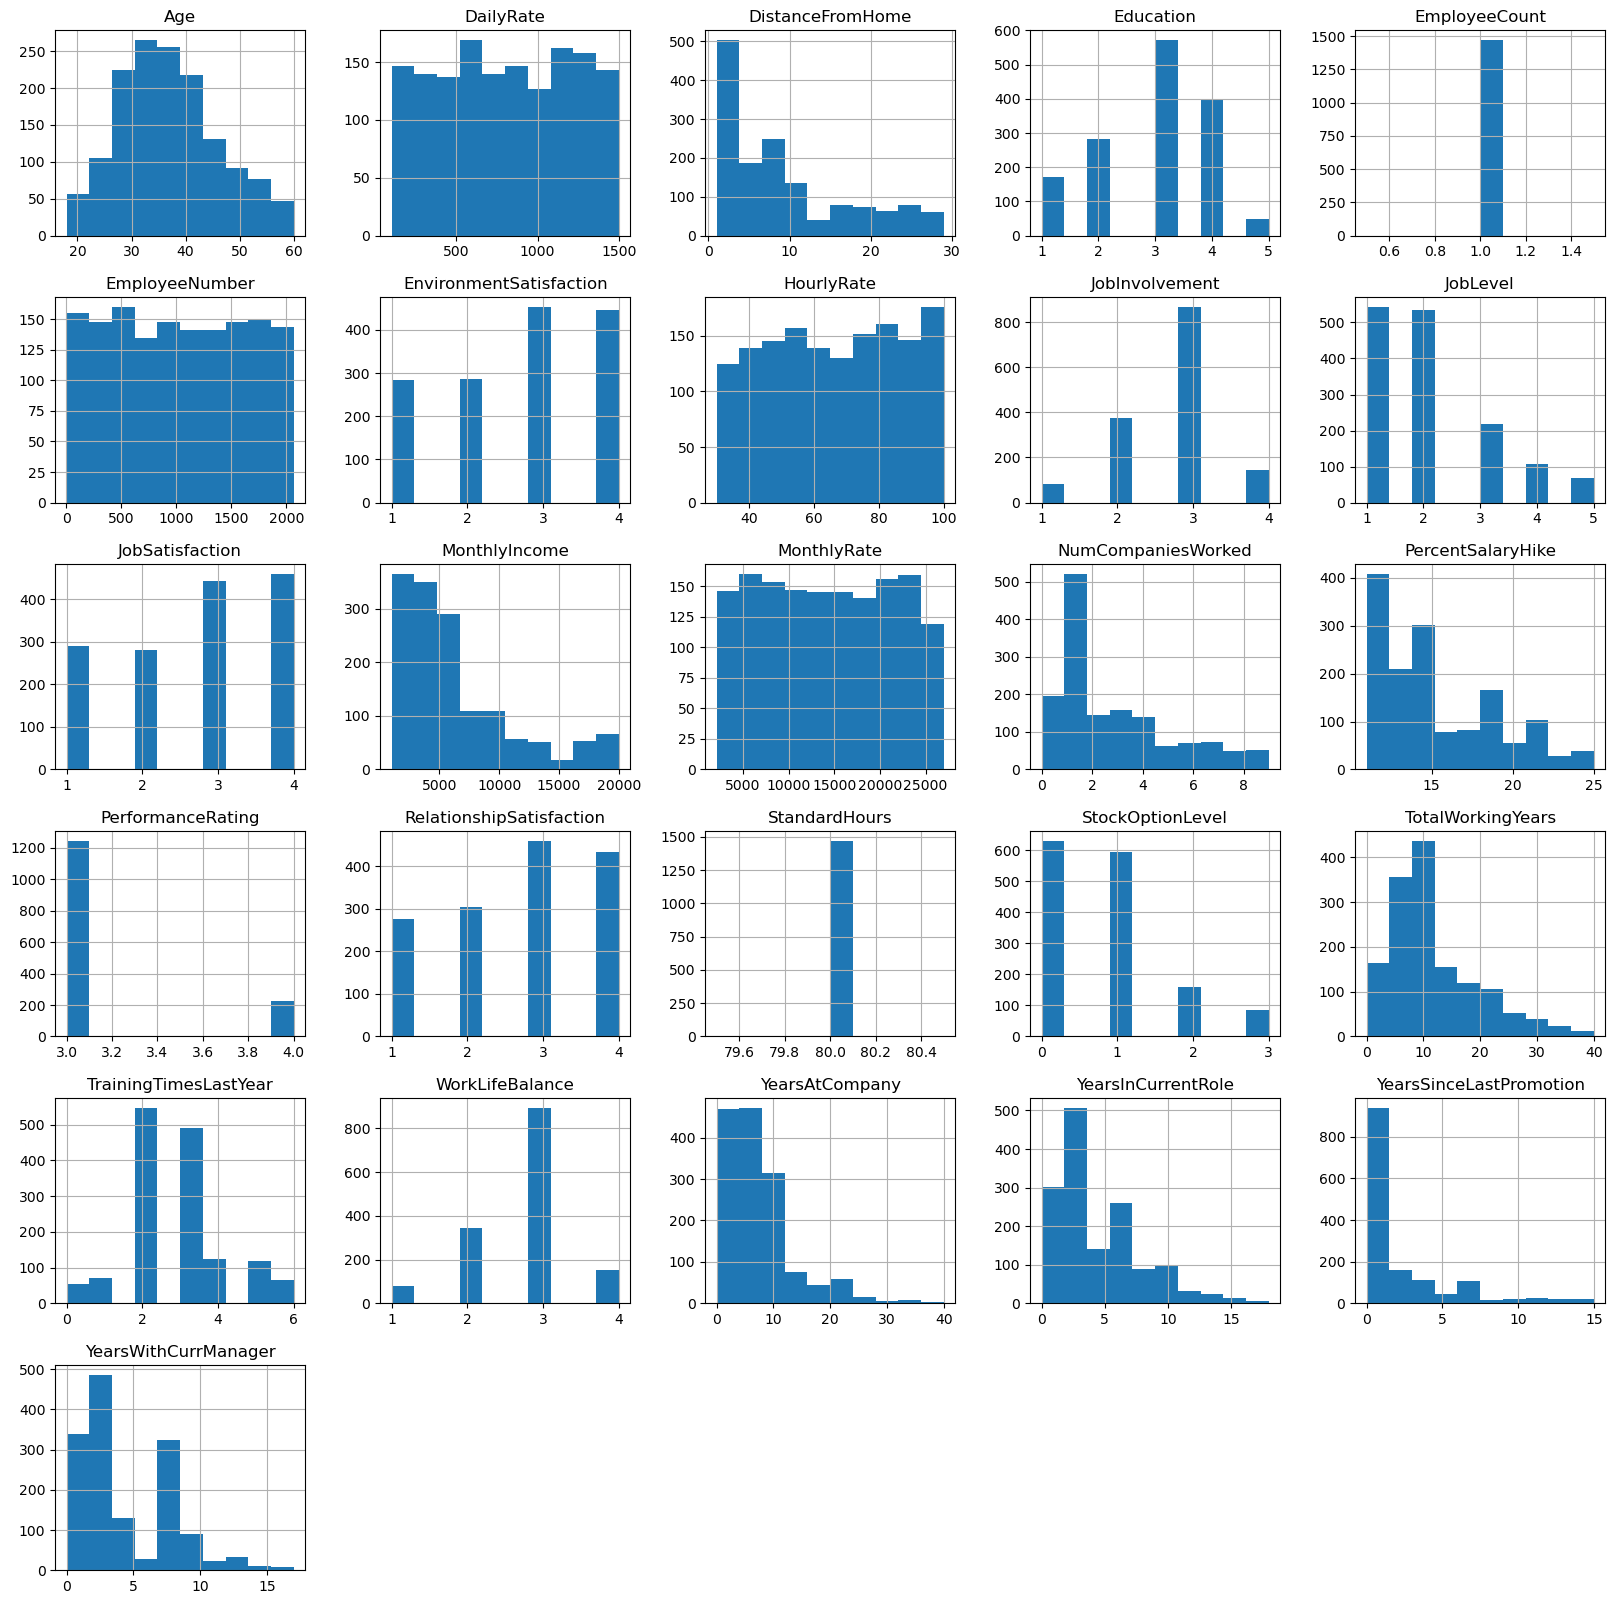

In [6]:
df.hist(figsize=(20,20))
plt.show()

In [7]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [8]:
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()}")

Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) == 2:
            df[col]=lb.fit_transform(df[col])

In [10]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0       0  ...                  3                         1                 0   
1       1  ...                  4                         4                 1   
2       1  ...                  3                         2                 0   
3       0  ...                  3                         3                 0   
4       1  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [11]:
df =  pd.get_dummies(df,columns=['BusinessTravel','Department','MaritalStatus'],drop_first=True)

In [12]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education EducationField  \
0   41          1       1102                 1          2  Life Sciences   
1   49          0        279                 8          1  Life Sciences   
2   37          1       1373                 2          2          Other   
3   33          0       1392                 3          4  Life Sciences   
4   27          0        591                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  BusinessTravel_Travel_Frequently  \
0                     5                                 0   
1                     7                                 1   
2                     0                                 0   
3                     0                                 1   
4                     2                                 0   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                             1                                  0   
1                             0                                  1   
2                             1                                  1   
3                             0                                  1   
4                             1                                  1   

   Department_Sales  MaritalStatus_Married  MaritalStatus_Single  
0                 1                      0                     1  
1                 0                      1                     0  
2                 0                      0                     1  
3                 0                      1                     0  
4                 0                      1                     0  

[5 rows x 34 columns]

In [13]:
target=df['Attrition']
X=df.drop(['Attrition'],axis=1)

In [14]:
target.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=1,stratify=target)

In [16]:
import category_encoders as ce
ce_target=ce.TargetEncoder(cols=['EducationField','JobRole'])

X_train=ce_target.fit_transform(X_train,y_train)
X_test=ce_target.transform(X_test)

In [17]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X_train,y_train)

In [18]:
print('Distribution of target {}'.format(y_sm.value_counts()))

Distribution of target 0    986
1    986
Name: Attrition, dtype: int64


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import cross_validate,KFold

kfold=KFold(n_splits=5)

cv_acc_results=cross_validate(tree_clf,X_sm,y_sm,cv=kfold,scoring='accuracy',return_train_score=True)

In [21]:
cv_acc_results['train_score'].mean()

1.0

In [22]:
cv_acc_results['test_score'].mean()

0.8078866542440404

In [23]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(X_sm.columns)

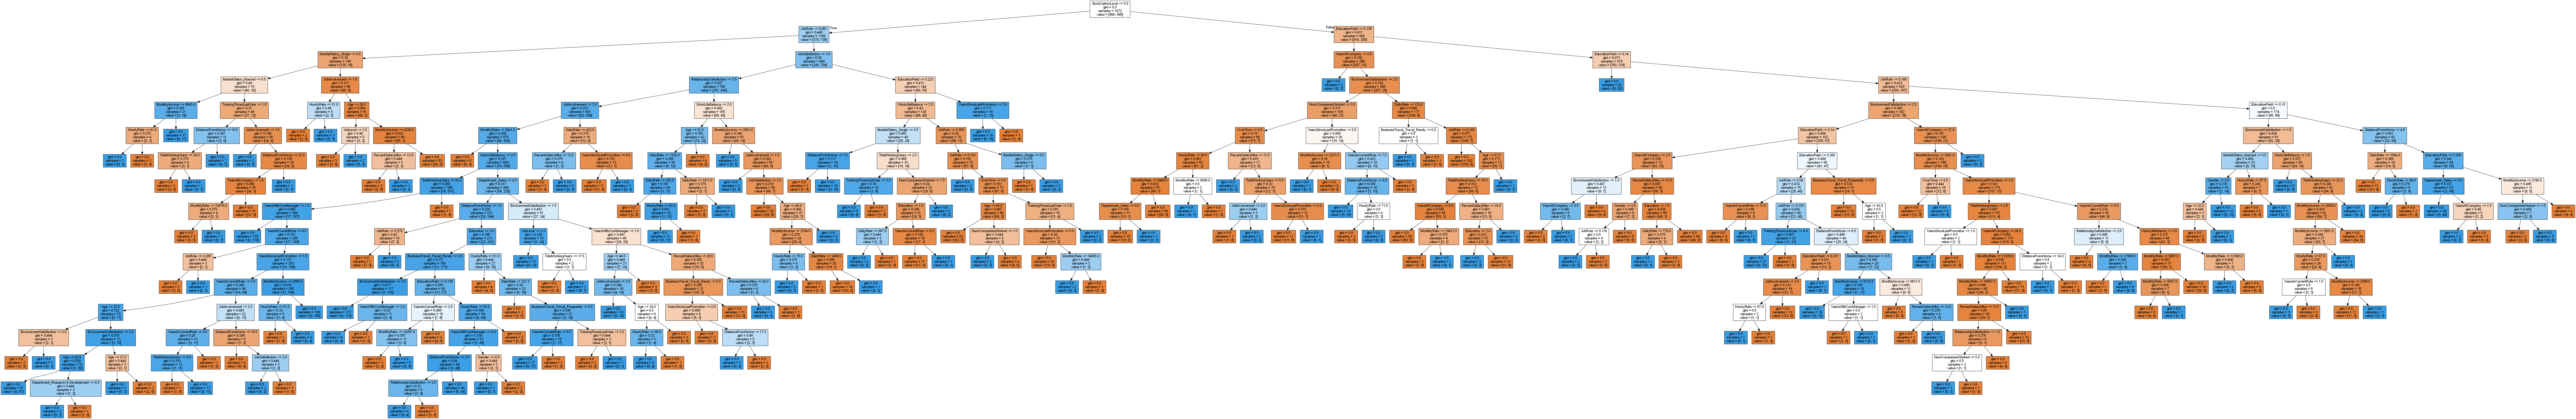

In [24]:
tree_clf=tree_clf.fit(X_sm,y_sm)

dot_data=StringIO()
export_graphviz(tree_clf,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())



In [25]:
tree_clf=DecisionTreeClassifier(random_state=7,max_depth=8,min_samples_leaf=5,min_samples_split=14)

cv_acc_results=cross_validate(tree_clf,X_sm,y_sm,cv=kfold,scoring='accuracy',return_train_score=True)

In [26]:
cv_acc_results['train_score'].mean()

0.9045403145501758

In [27]:
cv_acc_results['test_score'].mean()

0.78199704427167

In [35]:
tree_clf=tree_clf.fit(X_sm,y_sm)
pred=tree_clf.predict(X_test)

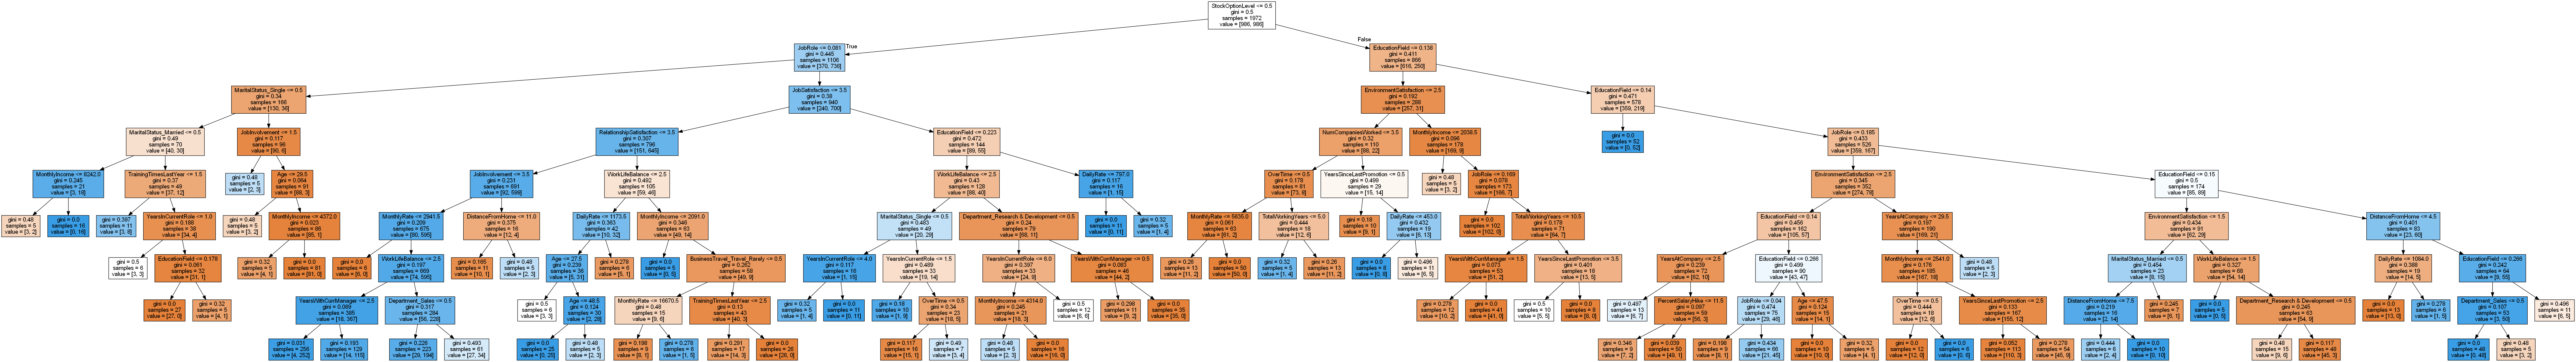

In [28]:
tree_clf=tree_clf.fit(X_sm,y_sm)

dot_data=StringIO()
export_graphviz(tree_clf,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())



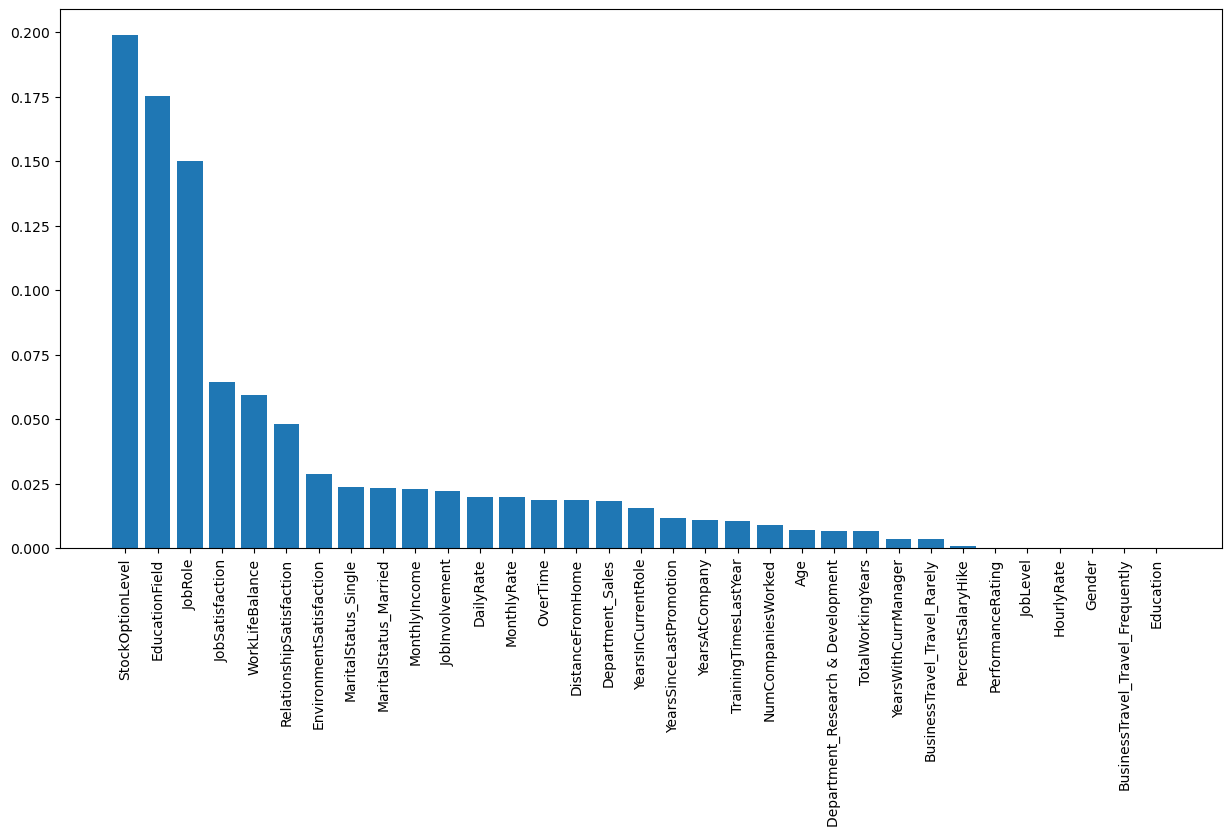

In [32]:
importances=tree_clf.feature_importances_
indices=np.argsort(importances)[::-1]
names=[X_train.columns[i] for i in indices]

plt.figure(figsize=(15,7))
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=90)
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[194  53]
 [ 23  24]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       247
           1       0.31      0.51      0.39        47

    accuracy                           0.74       294
   macro avg       0.60      0.65      0.61       294
weighted avg       0.80      0.74      0.76       294



In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()